# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv('/datasets/autos.csv')

In [4]:
data.head(20)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Предобработка данных

In [6]:
data.duplicated().sum()

4

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

Отфильтруем таблицу так, чтобы в ней остались только значимые признаки.
Значимыми для ценообразования кажутся следующие: 
- тип кузова
- год регистрации
- тип коробки передач
- мощность
- модель
- пробег
- тип топлива
- марка
- была ли машина в ремонте

In [9]:
data_f = data[['VehicleType', 
            'RegistrationYear', 
            'Gearbox',
            'Power',
            'Model',
            'Kilometer',
            'FuelType',
            'Brand',
            'Repaired',
            'Price']]
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       316875 non-null  object
 1   RegistrationYear  354365 non-null  int64 
 2   Gearbox           334532 non-null  object
 3   Power             354365 non-null  int64 
 4   Model             334660 non-null  object
 5   Kilometer         354365 non-null  int64 
 6   FuelType          321470 non-null  object
 7   Brand             354365 non-null  object
 8   Repaired          283211 non-null  object
 9   Price             354365 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


In [10]:
data_f.isna().sum()

VehicleType         37490
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19705
Kilometer               0
FuelType            32895
Brand                   0
Repaired            71154
Price                   0
dtype: int64

Сначала посмотрим на значения в столбце Price.

In [11]:
data_f['Price'].value_counts()

0        10772
500       5670
1500      5394
1000      4648
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: Price, Length: 3731, dtype: int64

Удалим те строки, в которых цена равна 0 - это явно неправда.

In [12]:
data_f = data_f.query('Price > 0')

Посмотрим на распределение данных по цене в оставшейся таблице.

count    343593.000000
mean       4555.147363
std        4515.076200
min           1.000000
25%        1200.000000
50%        2890.000000
75%        6500.000000
max       20000.000000
Name: Price, dtype: float64

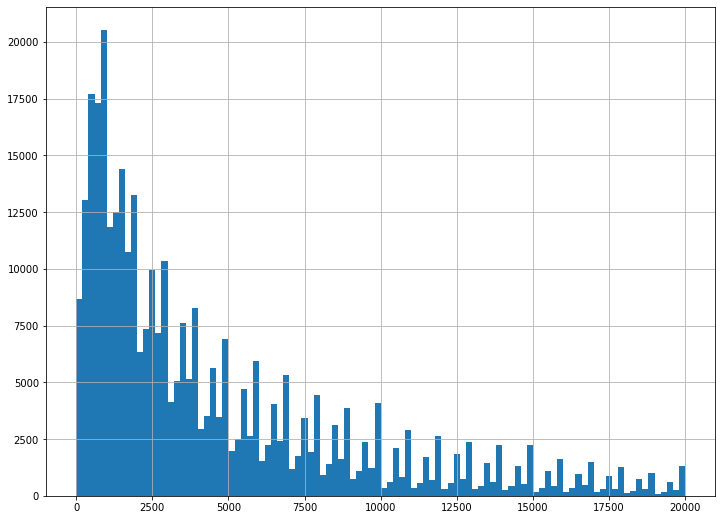

In [13]:
data_f['Price'].hist(bins=100, figsize=(12,9))
data_f['Price'].describe()

Посмотрим на самое позднее время скачивания анкеты в оригинальной таблице - все не соответствующие этим ограничениям строки можно будет удалить.

In [14]:
date = pd.to_datetime(data['DateCrawled'])
date.max()

Timestamp('2016-04-07 14:36:58')

In [15]:
data_f = data_f.query('RegistrationYear <= 2016')

count    329814.000000
mean       2002.461727
std          12.963860
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64

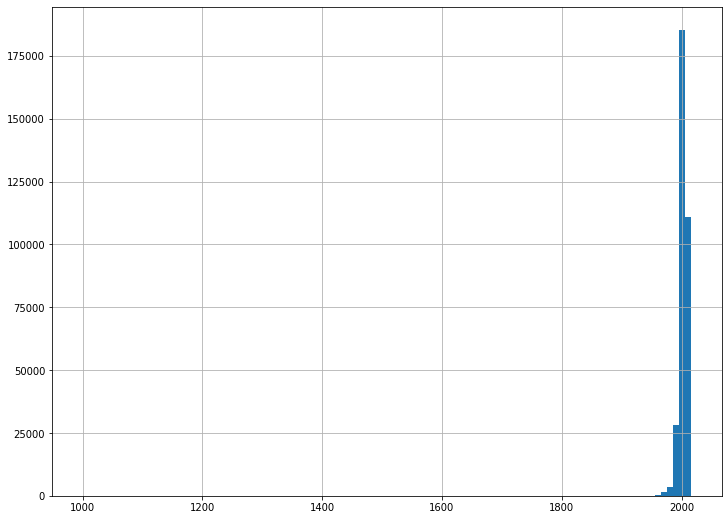

In [16]:
data_f['RegistrationYear'].hist(bins=100, figsize=(12,9))
data_f['RegistrationYear'].describe()

Уберем еще выбросы, где год меньше 1900.

count    329761.000000
mean       2002.593600
std           6.927904
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64

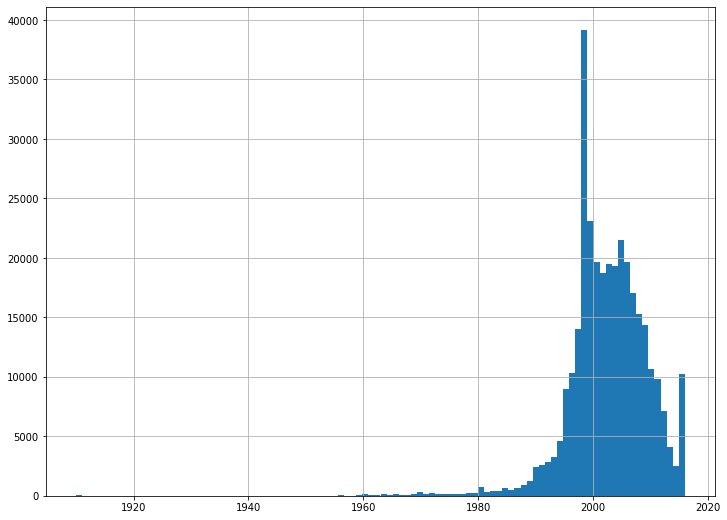

In [17]:
data_f = data_f.query('RegistrationYear >= 1900')
data_f['RegistrationYear'].hist(bins=100, figsize=(12,9))
data_f['RegistrationYear'].describe()

По гистограмме понятно, что на самом деле можно взять левой границей 1960 год.

count    329474.000000
mean       2002.646443
std           6.674568
min        1960.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64

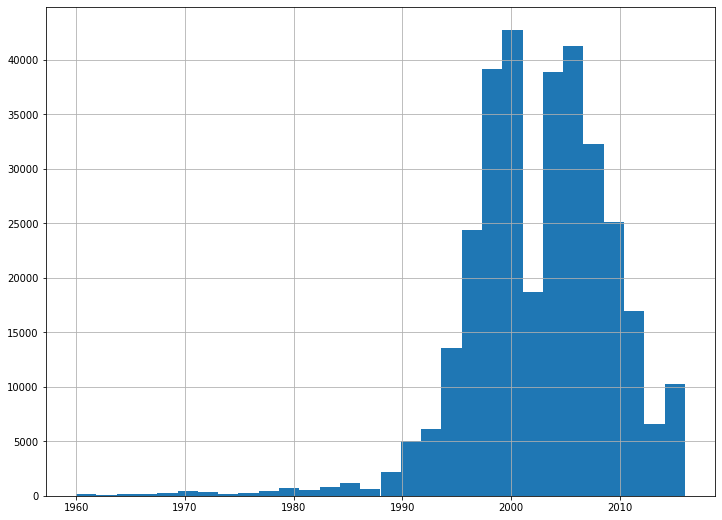

In [18]:
data_f = data_f.query('RegistrationYear >= 1960')
data_f['RegistrationYear'].hist(bins=30, figsize=(12,9))
data_f['RegistrationYear'].describe()

Посмотрим, в каких еще столбцах остались пропуски.

In [19]:
data_f.isna().sum()

VehicleType         19897
RegistrationYear        0
Gearbox             15517
Power                   0
Model               15519
Kilometer               0
FuelType            24105
Brand                   0
Repaired            59759
Price                   0
dtype: int64

Тип кузова и тип топлива непонятно, как восстановить - просто удалим строки, где эти значения пропущены.

In [20]:
data_f = data_f.dropna(subset=['VehicleType', 'FuelType'])

In [21]:
data_f.isna().sum()

VehicleType             0
RegistrationYear        0
Gearbox              7349
Power                   0
Model                9304
Kilometer               0
FuelType                0
Brand                   0
Repaired            42218
Price                   0
dtype: int64

In [22]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295111 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       295111 non-null  object
 1   RegistrationYear  295111 non-null  int64 
 2   Gearbox           287762 non-null  object
 3   Power             295111 non-null  int64 
 4   Model             285807 non-null  object
 5   Kilometer         295111 non-null  int64 
 6   FuelType          295111 non-null  object
 7   Brand             295111 non-null  object
 8   Repaired          252893 non-null  object
 9   Price             295111 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.8+ MB


Если тип коробки передач не указан, скорее всего, она механическая; если не указано, чинили ли машину - скорее всего, нет; модель восстановить невозможно, но если бренд уже известен, то это может быть не настолько критичной информацией, поэтому пропуски в столбце моделей мы просто заменим на unknown.

In [23]:
data_f.fillna({'Gearbox':'manual', 
                           'Repaired':'no',
                           'Model':'unknown'},
                          inplace=True)

In [24]:
data_f.isna().sum()

VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
Price               0
dtype: int64

In [25]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295111 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       295111 non-null  object
 1   RegistrationYear  295111 non-null  int64 
 2   Gearbox           295111 non-null  object
 3   Power             295111 non-null  int64 
 4   Model             295111 non-null  object
 5   Kilometer         295111 non-null  int64 
 6   FuelType          295111 non-null  object
 7   Brand             295111 non-null  object
 8   Repaired          295111 non-null  object
 9   Price             295111 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.8+ MB


Посмотрим теперь на значения в столбце Power.

<AxesSubplot:>

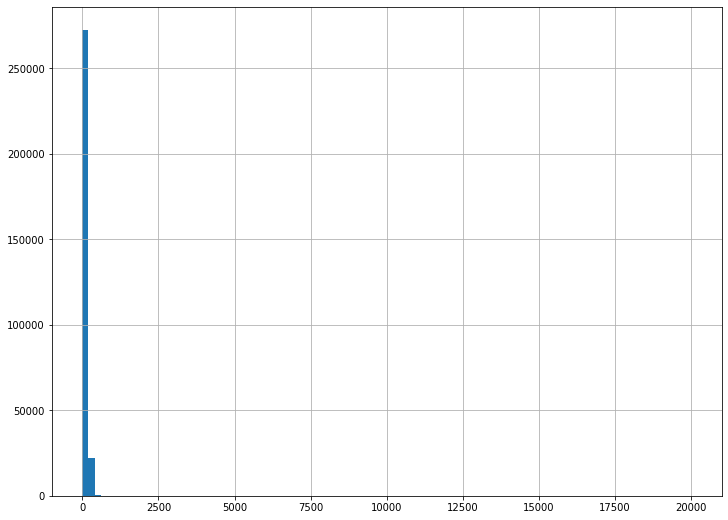

In [26]:
data_f['Power'].hist(bins=100, figsize=(12, 9))

Начнем с того, что отсечем все очевидно аномальные значения - например, больше 750 л.с., а также равные 0.

count    274497.000000
mean        121.681814
std          54.227181
min           1.000000
25%          80.000000
50%         115.000000
75%         150.000000
max         732.000000
Name: Power, dtype: float64

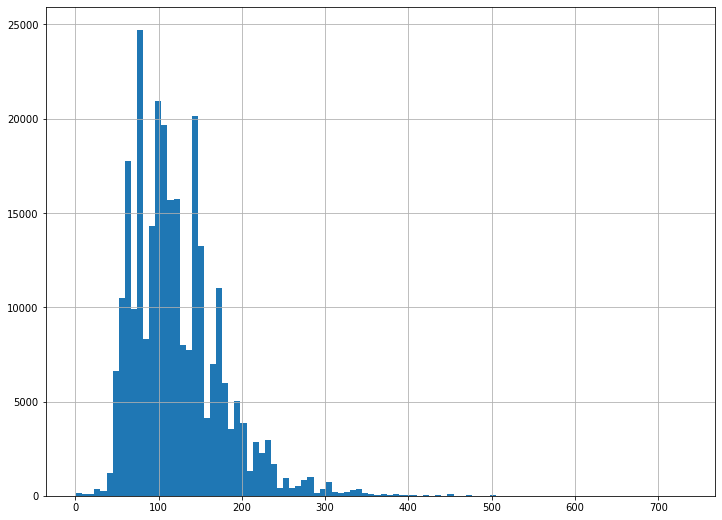

In [27]:
data_f = data_f.query('0 < Power <= 750')
data_f['Power'].hist(bins=100, figsize=(12, 9))
data_f['Power'].describe()

По гистограмме видно, что значения меньше 50 и больше 350 тоже можно отбросить, это скорее всего выбросы.

count    269114.000000
mean        122.266333
std          51.205911
min          50.000000
25%          82.000000
50%         115.000000
75%         150.000000
max         350.000000
Name: Power, dtype: float64

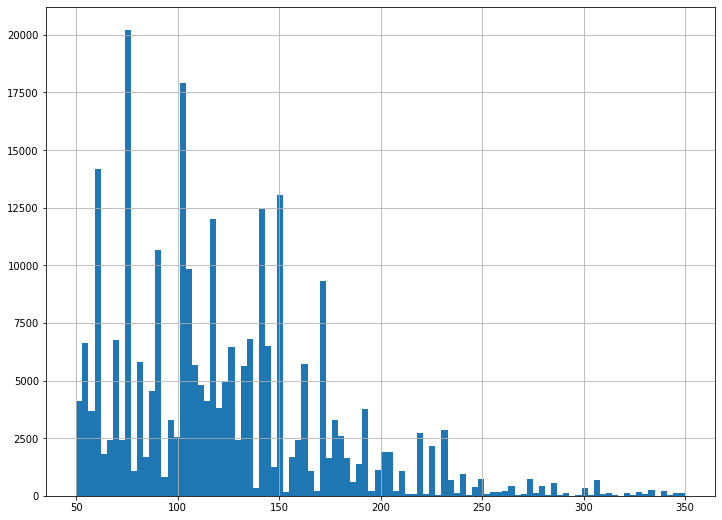

In [28]:
data_f = data_f.query('50 <= Power <= 350')
data_f['Power'].hist(bins=100, figsize=(12, 9))
data_f['Power'].describe()

In [29]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269114 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       269114 non-null  object
 1   RegistrationYear  269114 non-null  int64 
 2   Gearbox           269114 non-null  object
 3   Power             269114 non-null  int64 
 4   Model             269114 non-null  object
 5   Kilometer         269114 non-null  int64 
 6   FuelType          269114 non-null  object
 7   Brand             269114 non-null  object
 8   Repaired          269114 non-null  object
 9   Price             269114 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 22.6+ MB


Наконец, последнее, что мы сделаем в рамках предобработки данных - поменяем столбцы Repaired и Gearbox на булев тип, поскольку оба этих столбца содержат два возможных значения, и это поможет нам немного выиграть в памяти.

In [30]:
data_f['IsManual'] = 0
data_f.loc[data_f['Gearbox'] == 'manual', 'IsManual'] = 1
data_f['IsRepaired'] = 0
data_f.loc[data_f['Repaired'] == 'yes', 'IsRepaired'] = 1
data_f['IsManual'] = data_f['IsManual'].astype('bool')
data_f['IsRepaired'] = data_f['IsRepaired'].astype('bool')
data_f.drop(['Repaired','Gearbox'], inplace=True, axis=1)
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269114 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       269114 non-null  object
 1   RegistrationYear  269114 non-null  int64 
 2   Power             269114 non-null  int64 
 3   Model             269114 non-null  object
 4   Kilometer         269114 non-null  int64 
 5   FuelType          269114 non-null  object
 6   Brand             269114 non-null  object
 7   Price             269114 non-null  int64 
 8   IsManual          269114 non-null  bool  
 9   IsRepaired        269114 non-null  bool  
dtypes: bool(2), int64(4), object(4)
memory usage: 19.0+ MB


Предобработка данных на этом завершена. Мы удалили строки, данные в которых не подлежали восстановлению, заполнили пропуски там, где это было возможно, избавились от аномальных значений, поменяли тип данных в двух столбцах и при этом получили довольно серьезный выигрыш в памяти - от 43.3 мб в начале до 19 мб в конце.

## Обучение моделей

Рассмотрим для этой задачи следующие модели:
- линейная регрессия
- CatBoostRegressor
- LGBMRegressor

In [31]:
features = data_f.drop(['Price'], axis=1)
target = data_f['Price']
ohe_features_train = pd.get_dummies(features_train, drop_first=True)
ohe_features_test = pd.get_dummies(features_test, drop_first=True)

### Линейная регрессия

In [34]:
%%time

model_reg = LinearRegression(n_jobs=-1)
parameters_linreg = {'copy_X': [True, False],
              'fit_intercept': [True, False],
             }
grid = GridSearchCV(model_reg, param_grid=parameters_linreg, cv=5, scoring='neg_mean_squared_error')
grid.fit(ohe_features_train, target_train)
grid.best_params_

CPU times: user 7min 40s, sys: 7min 27s, total: 15min 7s
Wall time: 15min 9s


{'copy_X': True, 'fit_intercept': True}

### CatBoostRegressor

In [32]:
%%time

model_cat = CatBoostRegressor(cat_features=['VehicleType','FuelType','Brand','Model'], verbose=False, random_state=12345)
parameters_cat = {'learning_rate':[0.1, 0.5, 0.8]}
grid = GridSearchCV(model_cat, parameters_cat, cv=5, scoring='neg_mean_squared_error')
grid.fit(features_train, target_train)
grid.best_params_

CPU times: user 34min 52s, sys: 11.5 s, total: 35min 3s
Wall time: 35min 34s


{'learning_rate': 0.5}

### LGBM Regressor

In [33]:
cat_columns = ['VehicleType','FuelType','Brand','Model']
cat_features = features[cat_columns]
lgbm_features_train = features_train.copy()
lgbm_features_test = features_train.copy()
for column in cat_columns:
    lgbm_features_train[column] = lgbm_features_train[column].astype('category')
    lgbm_features_test[column] = lgbm_features_test[column].astype('category')

In [35]:
%%time

model_lgbm = LGBMRegressor(random_state=12345)
parameters_lgbm = {'num_leaves' : [100, 150, 200]}
grid = GridSearchCV(model_lgbm, parameters_lgbm, cv=5, scoring='neg_mean_squared_error')
grid.fit(lgbm_features_train, target_train)
grid.best_params_

CPU times: user 3h 21min 12s, sys: 2min 32s, total: 3h 23min 45s
Wall time: 3h 24min 49s


{'num_leaves': 200}

На этом шаге мы подобрали лучшие гиперпараметры для трех моделей. Проверим их на тестовых данных и выясним, какая лучше всего подходит для данной задачи.

## Анализ моделей

### Линейная регрессия

In [39]:
%%time

model_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=(-1))
model_reg.fit(ohe_features_train, target_train)

CPU times: user 17.6 s, sys: 11.1 s, total: 28.7 s
Wall time: 28.8 s


LinearRegression(n_jobs=-1)

In [40]:
%%time

predictions = model_reg.predict(ohe_features_train)

CPU times: user 3.51 s, sys: 941 ms, total: 4.45 s
Wall time: 4.49 s


In [42]:
mean_squared_error(target_train, predictions) ** 0.5

2498.075873179726

### CatBoostRegressor

In [43]:
%%time

model_cat = CatBoostRegressor(learning_rate=0.5, verbose=False, random_state=12345, cat_features=['VehicleType','FuelType','Brand','Model'])
model_cat.fit(features_train, target_train)

CPU times: user 2min 38s, sys: 953 ms, total: 2min 39s
Wall time: 2min 41s


In [44]:
%%time

predictions = model_cat.predict(features_train)

CPU times: user 2.82 s, sys: 34.6 ms, total: 2.85 s
Wall time: 2.85 s


In [45]:
mean_squared_error(target_train, predictions) ** 0.5

1404.7949488256504

### LGBM Regressor

In [46]:
%%time

model_lgbm = LGBMRegressor(random_state=12345, num_leaves=200)
model_lgbm.fit(lgbm_features_train, target_train)

CPU times: user 33min 39s, sys: 12.3 s, total: 33min 51s
Wall time: 34min 3s


LGBMRegressor(num_leaves=200, random_state=12345)

In [47]:
%%time

predictions = model_lgbm.predict(lgbm_features_train)

CPU times: user 3.89 s, sys: 0 ns, total: 3.89 s
Wall time: 3.9 s


In [48]:
mean_squared_error(target_train, predictions) ** 0.5

1357.0466172564204

## Тестирование лучшей модели

Поскольку обучение CatBoost заняло на порядок меньше времени, а точности моделей различаются не столь значимо, в качестве лучшей модели я порекомендую ее.

In [49]:
predictions = model_cat.predict(features_test)
mean_squared_error(target_test, predictions) ** 0.5

1554.1595069990412

Модель показала достаточно низкий уровень RMSE, чтобы принять ее.

## Выводы

- Модель линейной регрессии на этой задаче показала себя очень слабо - несмотря на то, что она быстро обучается и предсказывает, у нее слишком высокая метрика RMSE.
- Модель CatBoostRegressor предсказывает точнее, но обучается значительно дольше, да и подбор гиперпараметров для нее занял 40 минут про переборе только одного параметра.
- Модель LGBM Regressor дольше всех обучается и еще дольше подбираются гиперпараметры, но с точки зрения точности именно эта модель показывает наилучшие результаты.

Итого:
- если скорость настолько же важна, как и точность, стоит пользоваться моделью CatBoostRegressor
- если точность принципиально важнее скорости, лучше подойдет LGBM Regressor